In [7]:
import numpy as np
import matplotlib.pyplot as plt
import main
from main import calculate_many_conditions, Householder
main.OUTPUT_SEPARATOR = "  "

In [ ]:
calculate_many_conditions(10, 8)

In [ ]:
calculate_many_conditions(100, 8)

In [135]:
obj = Householder(10, 6, 8, debug=True)
obj.calculate_one()

calculation with Ns=10, Ne=6, density=0.6


Scipy didn't help
- Only thing that changed were complex eigenvalues
- From the internet I couldn't find anything usefule
   - except https://www.sympy.org/en/index.html but this is python based library so probably slow!
- Maybe calling LAPACK from python
    - https://www.matecdev.com/posts/fortran-in-python.html
    - https://stackoverflow.com/questions/18192633/call-lapack-drivers-functions-from-python

In [149]:
def plot_heatmap(matrix, title = '', text=True):
    up_lim = np.max(np.abs(matrix)) * 1.1
    plt.figure(figsize=(8, 6), dpi=120)
    plt.imshow(matrix, cmap='bwr', interpolation='nearest', vmin=-up_lim, vmax=up_lim)
    plt.colorbar()
    if title:
        plt.suptitle(f"Heatmap of {title}", y=0.97, fontsize=18)
    if text:
        plt.title('numbers x 10', fontsize=10)
    if text:
        for y in range(matrix.shape[0]):
            for x in range(matrix.shape[1]):
                plt.text(x, y, f'{10.0*matrix[y, x]:.1f}',
                         horizontalalignment='center',
                         verticalalignment='center',
                         fontsize=8, rotation=-25
                         )
    
            


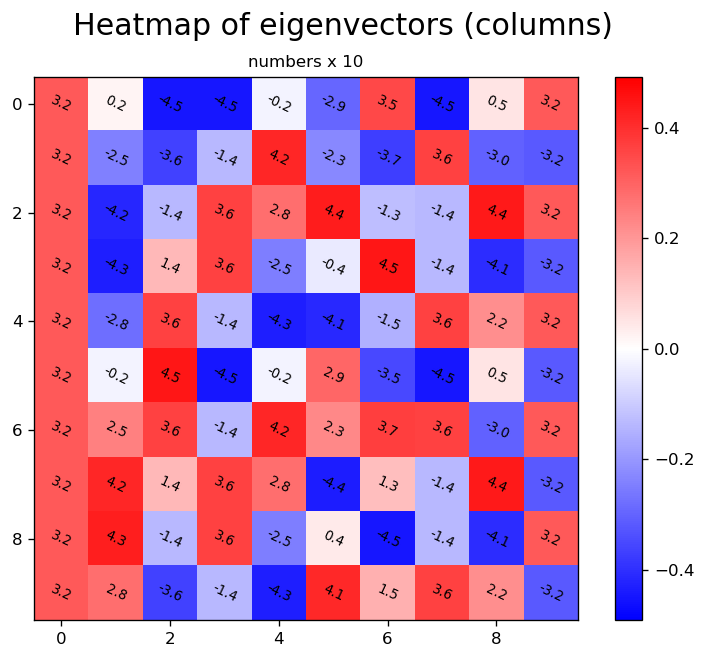

In [150]:
plot_heatmap(obj.ei_vec, "eigenvectors (columns)")


Text(0.5, 1.0, 'eigenvalues')

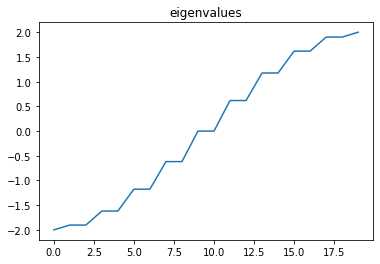

In [44]:
plt.plot(obj.ei_val)
plt.title("eigenvalues")

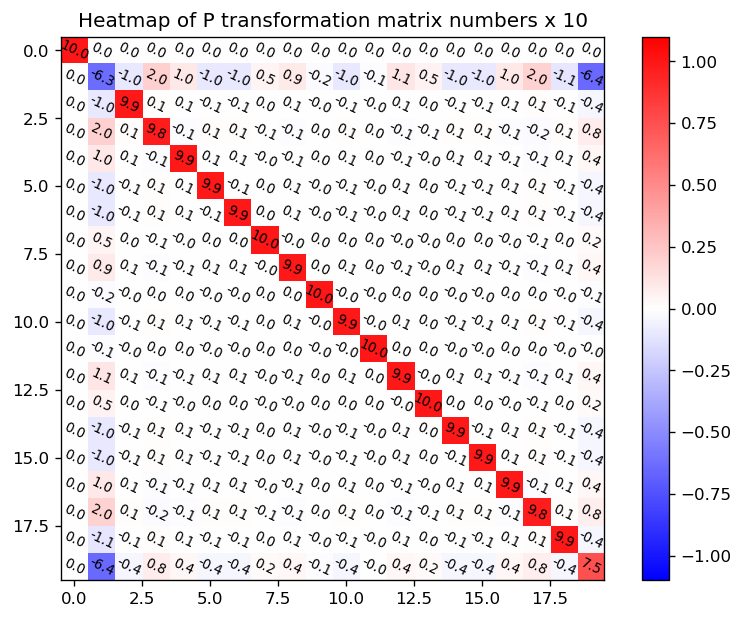

In [45]:
plot_heatmap(obj.P, "P transformation matrix")

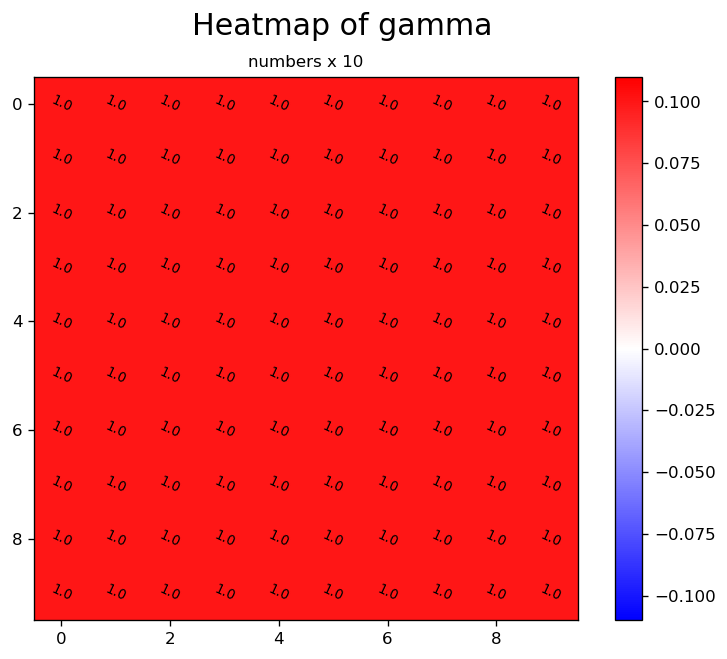

In [151]:
plot_heatmap(obj.gamma, "gamma")

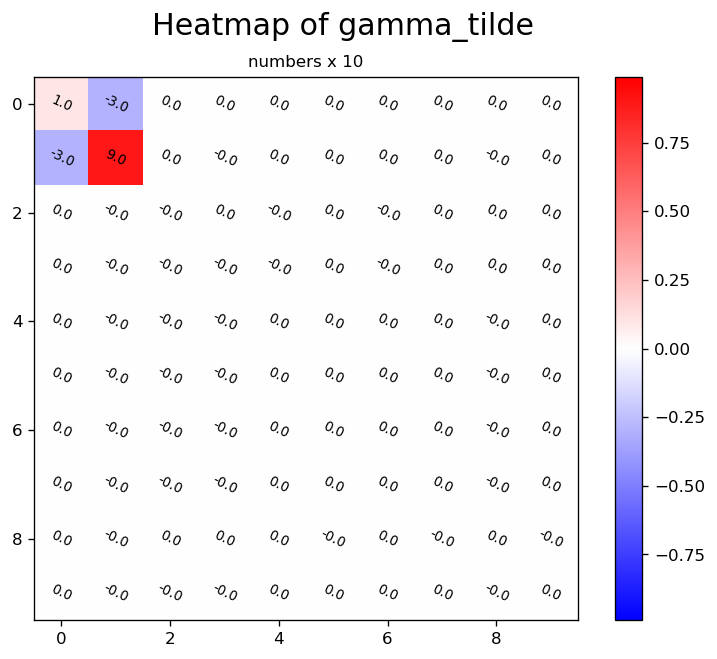

In [152]:
plot_heatmap(obj.gamma_tilde, "gamma_tilde")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

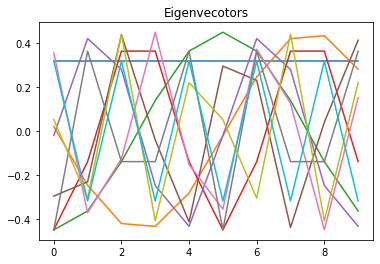

In [114]:
size = obj.ei_vec.shape[1]

for i in range(size):
    up_lim = np.max(np.abs(obj.ei_vec)) * 1.1
    plt.plot(list(range(size)), obj.ei_vec[:, i], label = obj.ei_val[i])
plt.title('Eigenvecotors')
list(range(size))

calculation with Ns=10, Ne=18, density=1.8


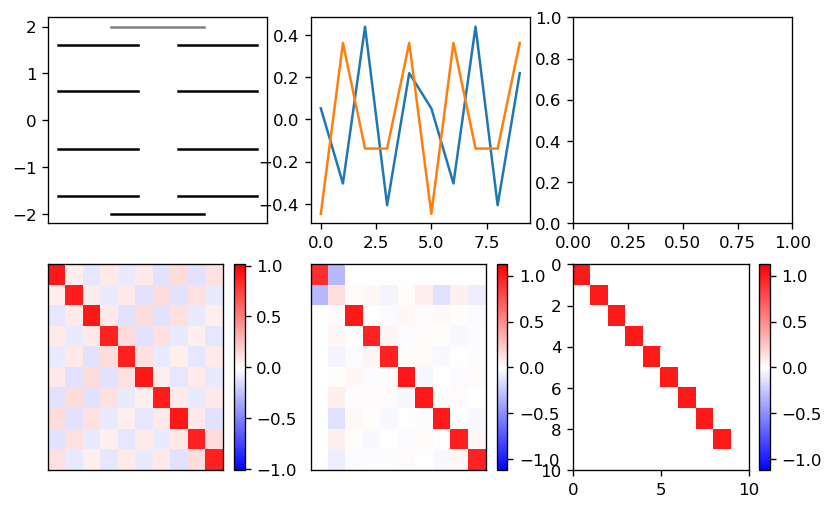

In [173]:
Ne_tot = 18
Ns = 10
obj = Householder(Ns, Ne_tot, 8, debug=True)
obj.calculate_one()

size = obj.ei_val.shape[0]
skip_next = False
ev = obj.ei_val
fig, ax = plt.subplots(2,3, figsize=(8,5), dpi=120)
ax[1,1].axes.xaxis.set_ticks([])
ax[1,1].axes.yaxis.set_ticks([])
ax[1,0].axes.xaxis.set_ticks([])
ax[1,0].axes.yaxis.set_ticks([])
ax[0,0].set_xticks([])
color = 'k'
Ne = 0
for i in range(size):
    if skip_next:
        skip_next = False
        continue
    if sum(abs(obj.ei_val - obj.ei_val[i])<1E-4) == 2:
        skip_next = True
        ax[0,0].plot([-1.5, -0.3], [ev[i], ev[i]], c=color)
        ax[0,0].plot([1.5, 0.3], [ev[i+1], ev[i+1]], c=color)
        Ne += 4
        if Ne >= Ne_tot:
            color = 'gray'
            
        # HOMO
        if Ne_tot/2 == i + 2:   
            ax[0,1].plot(obj.ei_vec[:, i + 1])
            ax[0,1].plot(obj.ei_vec[:, i])
            
        # gamma
        
    else:
        ax[0,0].plot([0.7, -0.7], [ev[i], ev[i]], c=color)
        Ne += 2
        if Ne >= Ne_tot:
            color = 'gray'
            
        # HOMO
        if Ne_tot/2 == i + 1:
            ax[0,1].plot(obj.ei_vec[:, i])
up_lim = np.max(np.abs(obj.gamma)) * 1.1
pcm = ax[1,0].pcolormesh(obj.gamma, cmap='bwr', vmin=-up_lim, vmax=up_lim)
fig.colorbar(pcm, ax=ax[1,0])
ax[1,0].invert_yaxis()

up_lim = np.max(np.abs(obj.gamma_tilde)) * 1.1
pcm = ax[1,1].pcolormesh(obj.gamma_tilde, cmap='bwr', vmin=-up_lim, vmax=up_lim)
fig.colorbar(pcm, ax=ax[1,1])
ax[1,1].invert_yaxis()

gamma_MO = np.zeros((Ns, Ns))
for i in range(int(Ne_tot/2)):
    gamma_MO[i,i] = 1

up_lim = np.max(np.abs(obj.gamma_tilde)) * 1.1
pcm = ax[1,2].pcolormesh(gamma_MO, cmap='bwr', vmin=-up_lim, vmax=up_lim)
fig.colorbar(pcm, ax=ax[1,2])
ax[1,2].invert_yaxis()
# Names of subplots
# Householder vector
# number of electrons and sites
# ...

In [169]:
np.max(obj.gamma)

0.9197760582243057

In [ ]:
def calculate_many_conditions_graphic(particle_number, U):
    data_string = ''
    result_string = ''
    first = True
    for i in np.arange(2, particle_number * 2, 4):
        obj = Householder(particle_number, i, U)
        obj.calculate_one()
        if result_string == '':
            result_string = obj.combined_results_string['col_names']
        result_string += obj.combined_results_string['row']
        data_string += obj.results_string
        if first:
            first = False
            obj.

In [9]:
obj = Householder(10, 18, 8, debug=True)
obj.calculate_one()
obj.gamma_tilde[:3,:3]

calculation with Ns=10, Ne=18, density=1.8


array([[ 9.15128230e-01, -3.11548500e-01, -1.21430643e-17],
       [-3.11548500e-01,  1.46591898e-01,  1.83761034e-02],
       [-1.21430643e-17,  1.83761034e-02,  1.00834501e+00]])